In [1]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", 300)
pd.set_option("max_colwidth", 200)

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNet
from numpy import arange
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

from sklearn import preprocessing

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import SequentialFeatureSelector

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

import matplotlib.pyplot as plt
import statistics

In [2]:
base = pd.read_csv('../Data/BaseData.csv')

In [3]:
base.shape

(2580, 299)

In [3]:
MLR = LinearRegression()

In [4]:
X = base.drop(['SalePrice'], axis=1).values
y = base.SalePrice.values

In [5]:
Scores = []

for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)
    MLR.fit(X_train, y_train)
    pred = MLR.predict(X_test)
    Score = r2_score(y_test, pred)
    Scores.append(Score)

In [6]:
Positive = []
Negative = []

for i in Scores:
    if i < 0:
        Negative.append(i)
    else:
        Positive.append(i)

Median R2 is: 0.9076746280664829
Mean R2 is: 0.8926334650515558
Standard Deviation R2 is: 0.031614057114497884


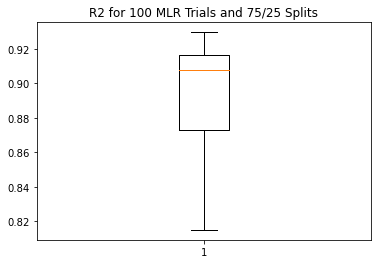

In [7]:
plt.boxplot(Positive)
plt.title('R2 for 100 MLR Trials and 75/25 Splits')
print("Median R2 is: " + str(statistics.median(Positive)))
print("Mean R2 is: " + str(statistics.mean(Positive)))
print("Standard Deviation R2 is: " + str(statistics.stdev(Positive)))

In [8]:
print("Number of times results produced Negative R2: " + str((len(Negative))))

Number of times results produced Negative R2: 17


In [9]:
Negative

[-51045.73854603703,
 -18706.866201514687,
 -80.89481048122063,
 -2332.1675838756073,
 -15491020.767086457,
 -7881.82781477978,
 -3449368.4645795813,
 -10999.50562735744,
 -4151.291926224774,
 -10748433.724518271,
 -8117.129296931264,
 -1024205.9962824067,
 -82731.7311966922,
 -3815112.291327478,
 -7239.4276182586555,
 -17693.489671260893,
 -149551.6675133324]

In [10]:
df = pd.DataFrame(Positive, columns=['MLR'])
df.to_csv('MLR_Scores.csv', index=False)

In [12]:
df_negative = pd.DataFrame(Negative, columns=['MLR Negative R2'])
df_negative.to_csv('MLR_Negative_R2.csv', index=False)